3. Tome una imagen a color de una persona, luego conviértela a una escala de grises de 9 valores. Luego, replique esa imagen 50 veces. Ahora tome cada imagen gris y a cada píxel de la imagen gris aleatoriamente asígnele un color RGB y genere 50 imágenes a color con base en esa asignación. La función de aptitud es la imagen a color original. Corra el algoritmo genético hasta cuando una de las imágenes concuerde en un 90% con la imagen original. Use enteros.

Programa:
Tome una imagen
Convertirla a una escala de grises de 9 valores
Luego replique esa imagen 50 veces
Tome cada imagen gris y a cada pixel asignele un color RGB y genere 50 imagenes a color con base en esto
La funcion de aptitud es la imagen a color original
Corra el algoritmo gasta que una de las imagenes concuerde en un 90% con la imagen original


In [1]:
import cv2
import numpy as np
import random
import os

In [10]:
# Cargar la imagen a color original
imagen_original = cv2.imread('imagen_original.jpg')

# Convertir la imagen a escala de grises de 9 valores
imagen_gris = cv2.cvtColor(imagen_original, cv2.COLOR_BGR2GRAY)
imagen_gris = np.floor_divide(imagen_gris, 32) * 32

# Crear la carpeta para guardar las imágenes generadas
if not os.path.exists('imagenes_generadas'):
    os.makedirs('imagenes_generadas')

# Función de aptitud (similitud entre la imagen a color original y una imagen generada)
def calcular_aptitud(imagen_generada):
    imagen_generada_color = cv2.cvtColor(imagen_generada, cv2.COLOR_GRAY2BGR)
    diferencia = cv2.absdiff(imagen_original, imagen_generada_color)
    porcentaje_similitud = 100 - (np.mean(diferencia) / 2.55)  # Escala de 0 a 100
    return porcentaje_similitud

# Algoritmo genético
numero_generaciones = 100       # 100 generaciones
tamano_poblacion = 50
probabilidad_mutacion = 0.1
umbral_aptitud = 90

poblacion_inicial = [imagen_gris.copy() for _ in range(tamano_poblacion)]

for generacion in range(numero_generaciones):
    print(f"Generación {generacion + 1}:")
    
    # Evaluar la función de aptitud para cada imagen generada en la población
    aptitudes = [calcular_aptitud(imagen_generada) for imagen_generada in poblacion_inicial]
    
    # Verificar si alguna imagen supera el umbral de aptitud y detener el algoritmo
    mejor_aptitud = max(aptitudes)
    if mejor_aptitud >= umbral_aptitud:
        indice_mejor = aptitudes.index(mejor_aptitud)
        imagen_mejor = poblacion_inicial[indice_mejor]
        print("¡Se alcanzó la aptitud deseada!")
        cv2.imwrite("imagen_resultante.jpg", imagen_mejor)
        break
    
    # Seleccionar las mejores imágenes
    mejores_indices = sorted(range(len(aptitudes)), key=lambda i: aptitudes[i], reverse=True)[:tamano_poblacion]
    mejores_imagenes = [poblacion_inicial[i] for i in mejores_indices]
    
    # Guardar las imágenes generadas en la carpeta
    for i, imagen_generada in enumerate(mejores_imagenes):
        cv2.imwrite(f"imagenes_generadas/generacion_{generacion+1}_imagen_{i+1}.jpg", imagen_generada)
    
    # Crear nueva generación aplicando cruza y mutación
    nueva_generacion = []
    for _ in range(tamano_poblacion):
        padre1, padre2 = random.choices(mejores_imagenes, k=2)
        
        # Cruza: mezclar píxeles aleatoriamente de los padres
        hijo = np.zeros_like(padre1)
        for i in range(hijo.shape[0]):
            for j in range(hijo.shape[1]):
                if random.random() < 0.5:
                    hijo[i, j] = padre1[i, j]
                else:
                    hijo[i, j] = padre2[i, j]
        
        # Mutación: cambiar aleatoriamente el valor de un píxel
        if random.random() < probabilidad_mutacion:
            i = random.randint(0, hijo.shape[0] - 1)
            j = random.randint(0, hijo.shape[1] - 1)
            hijo[i, j] = random.randint(0, 8) * 32
        
        nueva_generacion.append(hijo)
    
    poblacion_inicial = nueva_generacion


Generación 1:
Generación 2:
Generación 3:
Generación 4:
Generación 5:
Generación 6:
Generación 7:
Generación 8:
Generación 9:
Generación 10:
Generación 11:
Generación 12:
Generación 13:
Generación 14:
Generación 15:
Generación 16:
Generación 17:
Generación 18:
Generación 19:
Generación 20:
Generación 21:
Generación 22:
Generación 23:
Generación 24:
Generación 25:
Generación 26:
Generación 27:
Generación 28:
Generación 29:
Generación 30:
Generación 31:
Generación 32:
Generación 33:
Generación 34:
Generación 35:
Generación 36:
Generación 37:
Generación 38:
Generación 39:
Generación 40:
Generación 41:
Generación 42:
Generación 43:
Generación 44:
Generación 45:
Generación 46:
Generación 47:
Generación 48:
Generación 49:
Generación 50:
Generación 51:
Generación 52:
Generación 53:
Generación 54:
Generación 55:
Generación 56:
Generación 57:
Generación 58:
Generación 59:
Generación 60:
Generación 61:
Generación 62:
Generación 63:
Generación 64:
Generación 65:
Generación 66:
Generación 67:
Gene

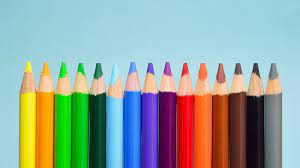

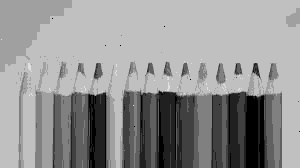

## Conclusión

En resumen, el código presentado muestra la implementación de un algoritmo genético para generar imágenes que se asemejen a una imagen a color original. A través de un proceso de selección, cruza y mutación, el algoritmo busca optimizar la aptitud de las imágenes generadas para acercarse lo más posible a la imagen original. 

El algoritmo se basa en la evaluación de la similitud entre la imagen original y las imágenes generadas utilizando una función de aptitud. A medida que avanza en cada generación, se seleccionan las mejores imágenes y se aplican operaciones de cruza y mutación para crear una nueva generación. El proceso continúa hasta que se alcanza una aptitud deseada o se completa un número máximo de generaciones. En conclusión, este código demuestra cómo los algoritmos genéticos pueden ser utilizados para la generación y optimización de imágenes, abriendo el camino a aplicaciones en campos como el arte generativo, la optimización de diseños y la generación automática de contenido visual.